In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sn
import pyecharts
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 数据清洗

In [2]:
house = pd.read_csv('C:/Users/ASUS/Desktop/nj1_house_infos.csv',encoding='gbk')
house

,house,money,location,house_info,house_type,part
0,金鹏大厦 4室2厅 9000元 复式,9000,鼓楼华侨路,-152㎡南4室2厅2卫,all,鼓楼
1,汉口路 3室1厅 1750元,1750,鼓楼宁海路,-79㎡南3室1厅1卫,all,鼓楼
2,宝塔桥东街16号大院 4室1厅 4500元,4500,鼓楼金陵小区,-51㎡南 北4室1厅2卫,all,鼓楼
3,整租 · 恒盛金陵湾 居家精装修 采光充足 树人陪读 拎包入住,6000,鼓楼定淮门大街,-103㎡南2室2厅1卫,all,鼓楼
4,星河翠庭 2室2厅 3800元,3800,鼓楼五塘广场,-93㎡南 北2室2厅1卫,all,鼓楼
5,东宝商厦 2室2厅 4500元,4500,鼓楼凤凰西街,-91㎡东2室2厅1卫,all,鼓楼
6,察哈尔路十二新村 2室1厅 3500元,3500,鼓楼挹江门,-60㎡南2室1厅1卫,all,鼓楼
7,世茂外滩新城 3室2厅 7500元,7500,鼓楼热河南路,-135㎡南 北3室2厅2卫,all,鼓楼
8,中海凤凰熙岸玺荟 1室1厅 4800元,4800,鼓楼凤凰西街,-57㎡南1室1厅1卫,all,鼓楼
9,陶谷新村 3室1厅 4700元,4700,鼓楼宁海路,-98㎡南 西3室1厅1卫,all,鼓楼


### 定义一个函数将住宅面积分离出来

In [4]:
def info_area_clean(s):
    temp = s.split('㎡')[0]
    if temp[0] == '-':
        return int(temp[1:])
    elif re.search(r'\d+-\d+',temp) != None:
        num1, num2 = temp.split('-')
        return (int(num1)+int(num2))/2
    else:
        return int(temp)

house['area'] = house.house_info.apply(info_area_clean)

### 提取房屋信息中的方位，如果在东南西北则保留

In [5]:
def info_toward_clean(s):
    result = ''
    for i in s:
        if i in ['东','南','西','北']:
            result += i
    return (result)

house['toward'] = house.house_info.apply(info_toward_clean)

### 提取租房的户型

In [6]:
house['apartment'] = house.house_info.apply(lambda x: x[-6:])

### 清洗租金

#### 租金中大部分都是一个数字，但有的是类似于1500-1700这种，我们采用其平均价位来代替其价格

In [7]:
def money_clean(s):
    if '-' in s:
        num1, num2 = s.split('-')
        return (int(num2)+int(num1))/2
    else:
        return int(s)
    
house['money'] = house.money.apply(money_clean)

### 删除House_info这一列

In [8]:
house = house.drop('house_info',axis=1)

In [9]:
house

,house,money,location,house_type,part,area,toward,apartment
0,金鹏大厦 4室2厅 9000元 复式,9000.0,鼓楼华侨路,all,鼓楼,152.0,南,4室2厅2卫
1,汉口路 3室1厅 1750元,1750.0,鼓楼宁海路,all,鼓楼,79.0,南,3室1厅1卫
2,宝塔桥东街16号大院 4室1厅 4500元,4500.0,鼓楼金陵小区,all,鼓楼,51.0,南北,4室1厅2卫
3,整租 · 恒盛金陵湾 居家精装修 采光充足 树人陪读 拎包入住,6000.0,鼓楼定淮门大街,all,鼓楼,103.0,南,2室2厅1卫
4,星河翠庭 2室2厅 3800元,3800.0,鼓楼五塘广场,all,鼓楼,93.0,南北,2室2厅1卫
5,东宝商厦 2室2厅 4500元,4500.0,鼓楼凤凰西街,all,鼓楼,91.0,东,2室2厅1卫
6,察哈尔路十二新村 2室1厅 3500元,3500.0,鼓楼挹江门,all,鼓楼,60.0,南,2室1厅1卫
7,世茂外滩新城 3室2厅 7500元,7500.0,鼓楼热河南路,all,鼓楼,135.0,南北,3室2厅2卫
8,中海凤凰熙岸玺荟 1室1厅 4800元,4800.0,鼓楼凤凰西街,all,鼓楼,57.0,南,1室1厅1卫
9,陶谷新村 3室1厅 4700元,4700.0,鼓楼宁海路,all,鼓楼,98.0,南西,3室1厅1卫


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32987 entries, 0 to 32986
Data columns (total 8 columns):
house         32987 non-null object
money         32987 non-null float64
location      32539 non-null object
house_type    32987 non-null object
part          32987 non-null object
area          32987 non-null float64
toward        32987 non-null object
apartment     32987 non-null object
dtypes: float64(2), object(6)
memory usage: 2.0+ MB


### 数据的清洗基本到此完成，接下来看一下缺失值的情况

In [11]:
sum(house.isna())

house           0
money           0
location      448
house_type      0
part            0
area            0
toward          0
apartment       0
dtype: int64

### 只有location公寓的位置有缺失，我们来看一下这些数据是什么情况？

In [12]:
house[house['location'].isna()]

,house,money,location,house_type,part,area,toward,apartment
22,漫领域 水关桥店 经济双人床房 开间,1700.0,NaN,all,鼓楼,27.5,南北,1室0厅1卫
26,世联红璞公寓 热河南路店 仙踪系一室一厅,2100.0,NaN,all,鼓楼,20.0,东,1室1厅1卫
28,未来域白领公寓 中山北路店 地中海B,1900.0,NaN,all,鼓楼,25.0,北,1室1厅1卫
52,漫领域 水关桥店 经济双人床房 开间,1700.0,NaN,all,鼓楼,27.5,南北,1室0厅1卫
56,世联红璞公寓 热河南路店 仙踪系一室一厅,2100.0,NaN,all,鼓楼,20.0,东,1室1厅1卫
58,未来域白领公寓 中山北路店 地中海B,1900.0,NaN,all,鼓楼,25.0,北,1室1厅1卫
60,未来域白领公寓 中山北路店 地中海A,2200.0,NaN,all,鼓楼,30.0,南,1室1厅1卫
89,亿立方公寓 广东路店 落地窗阳光房 开间,1600.0,NaN,all,鼓楼,20.0,南,1室0厅1卫
91,自由寓 金川店 LOFT精装二室一厅 二居+,2600.0,NaN,all,鼓楼,55.0,南,2室1厅1卫
92,青汇公寓 青汇公寓 C户型 开间,1600.0,NaN,all,鼓楼,23.5,东南,1室0厅1卫


### 我们能发现大部分这种缺失的地方都是单身公寓，考虑到大多数的情况，我们用房屋信息中的第二个为大部分的地址

In [13]:
house.loc[house['location'].isna(),'location'] = house.loc[house['location'].isna()].house.apply(lambda x : x.split()[1])

In [14]:
house.location.value_counts()

建邺奥体        3594
浦口桥北        2726
浦口江浦街道      2225
栖霞仙林        1495
江宁东山镇       1309
栖霞马群         886
江宁百家湖        864
栖霞栖霞其它       809
江宁岔路口        788
建邺万达广场       770
秦淮月牙湖        646
江宁江宁大学城      593
雨花台铁心桥       558
江宁麒麟镇        545
秦淮新街口        519
鼓楼龙江         514
鼓楼凤凰西街       453
江宁九龙湖        441
玄武仙鹤门        427
江宁科学园        393
栖霞迈皋桥        382
秦淮洪家园        377
江宁将军大道       356
建邺应天西路       353
鼓楼湖南路        351
鼓楼建宁路        345
栖霞万寿         337
浦口浦口其它       331
秦淮秦虹         317
浦口高新区        292
            ... 
长盛街店           2
狮子桥店           2
水西门店           2
胜太路店           2
江宁万达店          2
南京油坊桥店         2
孝陵卫店           2
南京新街口店         2
所街店二期          2
所街店一期          2
中华门地铁站         2
奥体店            1
玉桥店            1
南京龙眠大道店        1
青巢公寓           1
大明路店           1
上元路店           1
·              1
双拜巷店           1
春江店            1
玄武马群           1
摩尔公寓           1
中央门店           1
栖霞仙鹤门          1
雅轩域公寓景明店       1
云南北路店          1
河西店            1
中央路店          

### 接下来进行一些可视化分析

#### 先看一下房屋户型的情况

In [15]:
z = house.apartment.value_counts()[:10].sort_values()
z

5室1厅1卫     912
4室1厅2卫    1017
5室1厅2卫    1022
3室2厅2卫    1569
2室2厅1卫    1929
3室2厅1卫    2171
1室1厅1卫    2771
3室1厅1卫    3539
2室1厅1卫    4779
4室1厅1卫    7821
Name: apartment, dtype: int64

In [16]:
bar = pyecharts.Bar("房屋户型分布前十","南京·NanJing")
bar.add(z,z.index,y_axis = list(z.values),is_convert= True,is_label_show =True,label_pos = 'inside',label_color = ["#996666"])
bar

In [17]:
part = house.part.value_counts().sort_values()
part_bar = pyecharts.Bar("各行政区房屋租赁数量分布及占比","南京·NanJing")
part_bar.add(part,part.index,part.values,is_label_show = True,label_color = ['#999999'],is_convert = True,label_pos = "inside")

pie_part = pyecharts.Pie(title_pos = "40%")
pie_part.add(part,part.index,part.values,is_label_show = True,legend_pos = '90%',legend_orient="vertical",center = [65,50])

grid = pyecharts.Grid(page_title="各行政区房屋租赁数量分布及占比",width=1200)
grid.add(part_bar,grid_right = "60%")
grid.add(pie_part,grid_left = "50%")
grid

### 了解一下不同地区租房平均情况

In [18]:
single_price = round(house.loc[house.house_type == 'single'].money.groupby(house.loc[house.house_type == 'single']['part']).mean(),0)
all_price = round(house.loc[house.house_type == 'all'].money.groupby(house.loc[house.house_type == 'all']['part']).mean(),0)

In [19]:
line = pyecharts.Line("各行政区租房价格·¥","南京·NanJing")
line.add("整租",all_price.index,all_price.values,is_label_show = True)
line.add("合租",single_price.index,single_price.values,is_label_show = True)
line

In [20]:
toward = house.toward.value_counts()[:8]
bar = pyecharts.Bar("房屋不同朝向数量","南京·NanJing")
bar.add(toward,toward.index,toward.values,label_color = ['#996666'],is_label_show = True)
bar

Text(0.5,0,'House Area')

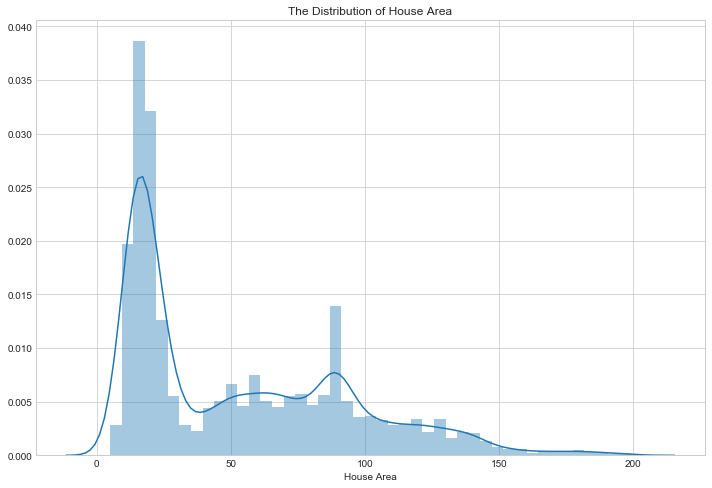

In [21]:
plt.rcParams['font.serif']=['simsunb']
plt.rcParams['axes.unicode_minus'] = False
sn.set_style("whitegrid")
plt.figure(figsize=(12,8))
sn.distplot(house.area[house.area < 200])
plt.title("The Distribution of House Area")
plt.xlabel('House Area')

In [22]:
house[house.house_type == 'single'].sort_values(by=['money'],ascending=False)

,house,money,location,house_type,part,area,toward,apartment
24367,合租 · 保利紫晶山 5室4厅 18000元,18000.0,栖霞马群,single,栖霞,300.0,南北,5室4厅2卫
22663,合租 · 现代大厦 1室1厅,7100.0,秦淮升州路,single,秦淮,90.0,东南,1室1厅1卫
27409,合租 · 颐和南园 5室1厅,4800.0,江宁九龙湖,single,江宁,55.0,西,5室1厅2卫
23725,合租 · 花好月苑 4室2厅 3500元,3500.0,雨花台雨花新村,single,雨花台,124.0,南,4室2厅1卫
24574,合租 · 招商1872 3室2厅 3500元,3500.0,栖霞万寿,single,栖霞,120.0,南北,3室2厅1卫
30061,合租 · 天景山公寓欣荣苑 3室2厅 3300元,3300.0,江宁东山镇,single,江宁,90.0,南北,3室2厅1卫
18190,合租 · 漫城名苑 3室1厅,3200.0,鼓楼凤凰西街,single,鼓楼,30.0,南,3室1厅1卫
27513,合租 · 21世纪现代城 7室2厅 复式,3100.0,江宁百家湖,single,江宁,75.0,南,7室2厅3卫
18817,合租 · 世茂外滩新城 3室0厅,2730.0,鼓楼热河南路,single,鼓楼,13.0,南,3室0厅0卫
21014,合租 · 精金花园 2室1厅,2700.0,建邺万达广场,single,建邺,16.0,南,2室1厅1卫
